In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from wordcloud import WordCloud
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import json
import requests
import time

In [2]:
import gmaps

gkey=""

gmaps.configure(gkey)

In [3]:
df=pd.read_csv("location_data.csv")
df.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,Elimination_Week,Place,Note,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Marketing Manager,Week 3,3,14.0,NaN,0,"Aurora, Illinois, USA",41.757170,-88.314754,Aurora,Illinois,US
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Cadaver Tissue Saleswoman,Week 1,1,24.0,NaN,0,"Manhattan Beach, California, USA",33.891599,-118.395124,Manhattan Beach,California,US
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Massage Therapist,Week 1,1,19.0,NaN,0,"Apopka, Florida, USA",28.677968,-81.511521,Apopka,Florida,US
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Grade School Teacher,Week 1,1,19.0,NaN,0,"Roanoke, Texas, USA",33.004013,-97.225848,Roanoke,Texas,US
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Former NFL Cheerleader,Week 4,4,12.0,NaN,0,"Hasbrouck Heights, New Jersey, USA",40.857929,-74.081669,Hasbrouck Heights,New Jersey,US


In [8]:
df["Season Bin"]=None
df.loc[df.Season <= 7, "Season Bin"] = "1-7"
df.loc[(df.Season > 7) & (df.Season <= 14), "Season Bin"] = "8-14"
df.loc[df.Season >14, "Season Bin"] = "15-21"
df.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,...,Place,Note,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country,Season Bin
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Marketing Manager,Week 3,...,14.0,NaN,0,"Aurora, Illinois, USA",41.757170,-88.314754,Aurora,Illinois,US,15-21
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Cadaver Tissue Saleswoman,Week 1,...,24.0,NaN,0,"Manhattan Beach, California, USA",33.891599,-118.395124,Manhattan Beach,California,US,15-21
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Massage Therapist,Week 1,...,19.0,NaN,0,"Apopka, Florida, USA",28.677968,-81.511521,Apopka,Florida,US,15-21
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Grade School Teacher,Week 1,...,19.0,NaN,0,"Roanoke, Texas, USA",33.004013,-97.225848,Roanoke,Texas,US,15-21
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Former NFL Cheerleader,Week 4,...,12.0,NaN,0,"Hasbrouck Heights, New Jersey, USA",40.857929,-74.081669,Hasbrouck Heights,New Jersey,US,15-21


In [9]:
df["Season Bin"].value_counts()

15-21    196
8-14     151
1-7       75
Name: Season Bin, dtype: int64

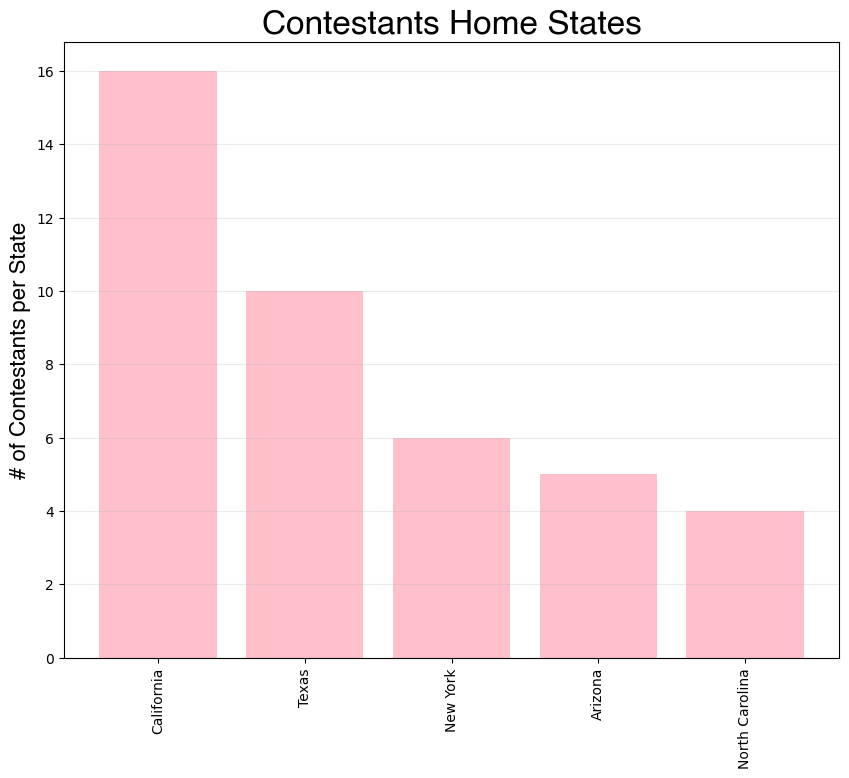

In [13]:
states = df.loc[df["Season Bin"] == "1-7"].clean_state.value_counts().head(5)
x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y,  color="pink")

# step 3 - customization
plt.ylabel("# of Contestants per State", fontname = "Helvetica", fontsize=16)
plt.title("Contestants Home States", fontsize=24, fontstyle="italic", fontweight="bold", fontname = "Helvetica")
plt.xticks(rotation=90)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

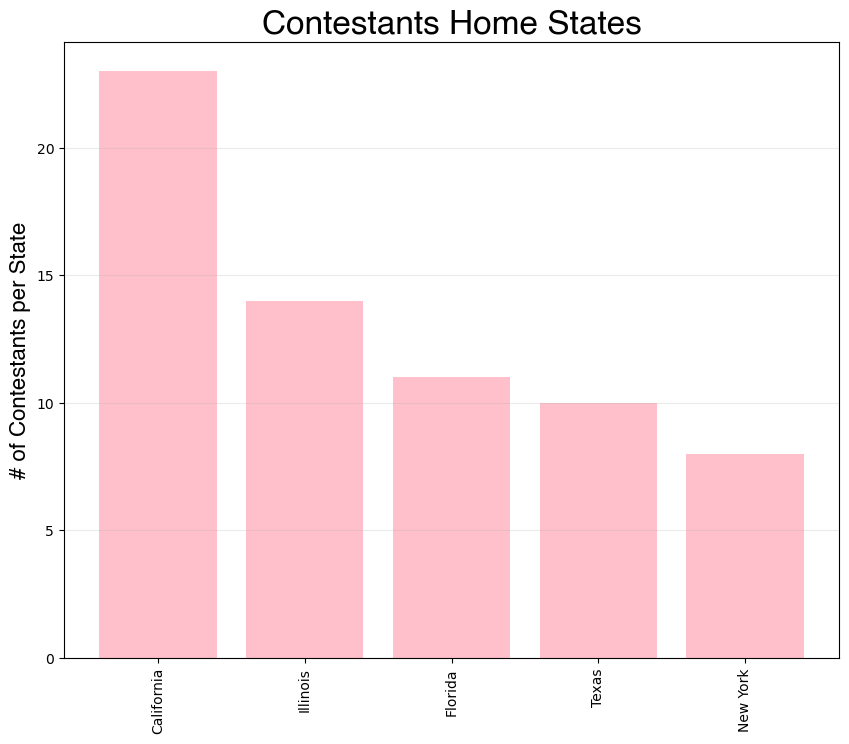

In [14]:
states = df.loc[df["Season Bin"] == "8-14"].clean_state.value_counts().head(5)
x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y,  color="pink")

# step 3 - customization
plt.ylabel("# of Contestants per State", fontname = "Helvetica", fontsize=16)
plt.title("Contestants Home States", fontsize=24, fontstyle="italic", fontweight="bold", fontname = "Helvetica")
plt.xticks(rotation=90)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

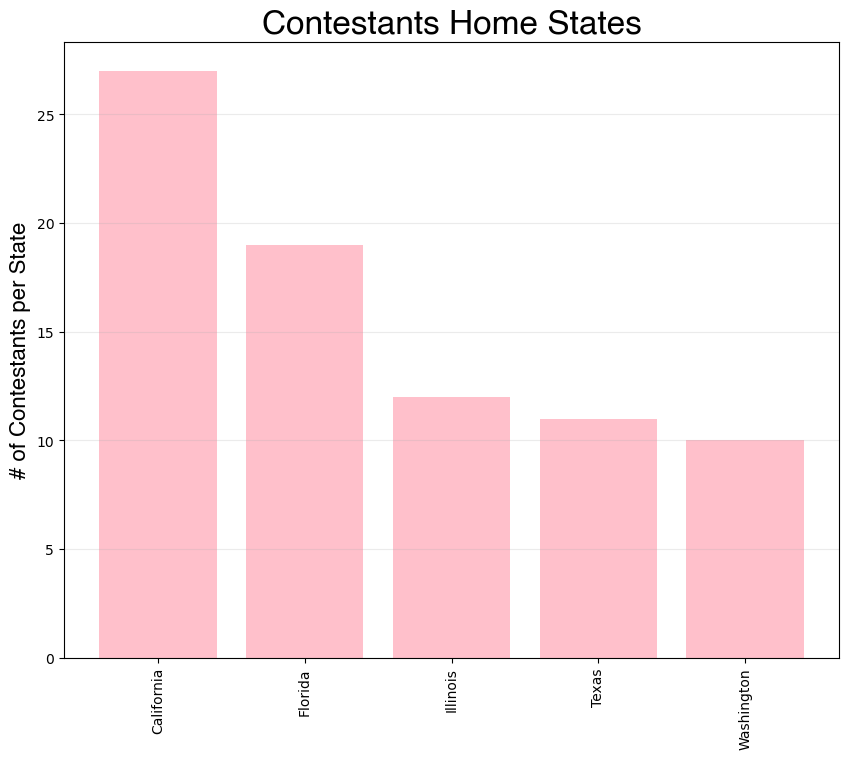

In [15]:
states = df.loc[df["Season Bin"] == "15-21"].clean_state.value_counts().head(5)
x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y,  color="pink")

# step 3 - customization
plt.ylabel("# of Contestants per State", fontname = "Helvetica", fontsize=16)
plt.title("Contestants Home States", fontsize=24, fontstyle="italic", fontweight="bold", fontname = "Helvetica")
plt.xticks(rotation=90)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

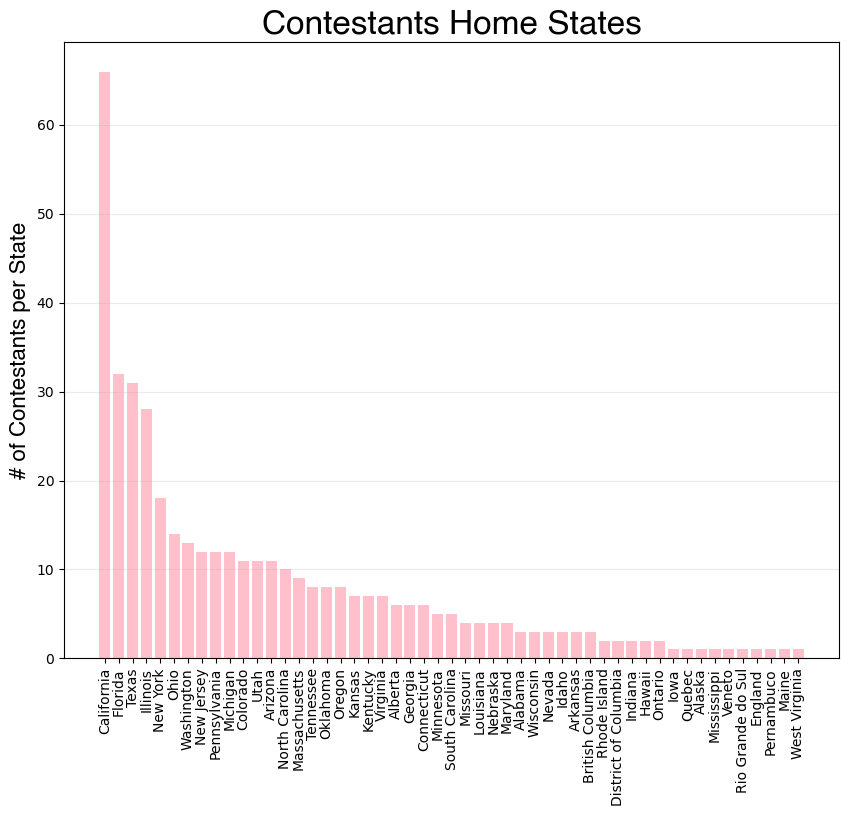

In [4]:
# step 1 - get the data
states = df.clean_state.value_counts()

x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y,  color="pink")

# step 3 - customization
plt.ylabel("# of Contestants per State", fontname = "Helvetica", fontsize=16)
plt.title("Contestants Home States", fontsize=24, fontstyle="italic", fontweight="bold", fontname = "Helvetica")
plt.xticks(rotation=90)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

In [7]:
# get data
data = df.loc[:, ["latitude", "longitude"]].dropna()

# Create BASE, init the graph
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '0px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout, map_type='SATELLITE')

# init the overlay layers
heat = gmaps.heatmap_layer(data)
fig.add_layer(heat)

# show the plot
fig

Figure(layout=FigureLayout(border='0px', height='600px', margin='0 auto 0 auto', padding='1px', width='800px')…

In [19]:
df2 = df.loc[df.Place<=5]

In [20]:
# get data
data = df2.loc[:, ["latitude", "longitude"]].dropna()

# Create BASE, init the graph
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '0px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout, map_type='SATELLITE')

# init the overlay layers
heat = gmaps.heatmap_layer(data)
fig.add_layer(heat)

# show the plot
fig

Figure(layout=FigureLayout(border='0px', height='600px', margin='0 auto 0 auto', padding='1px', width='800px')…

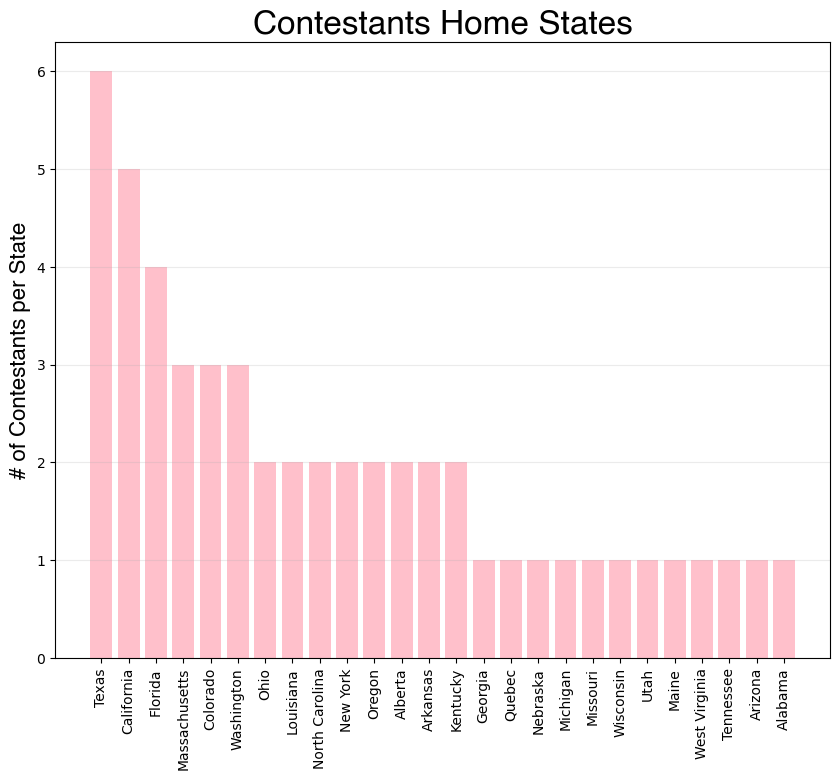

In [21]:
# step 1 - get the data
states = df2.clean_state.value_counts()

x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y,  color="pink")

# step 3 - customization
plt.ylabel("# of Contestants per State", fontname = "Helvetica", fontsize=16)
plt.title("Contestants Home States", fontsize=24, fontstyle="italic", fontweight="bold", fontname = "Helvetica")
plt.xticks(rotation=90)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

In [24]:
statesfinal = df2.clean_state.value_counts()
states = df.clean_state.value_counts()
data = statesfinal/states
data.sort_values(ascending=False)

West Virginia           1.000000
Quebec                  1.000000
Maine                   1.000000
Arkansas                0.666667
Louisiana               0.500000
Alabama                 0.333333
Alberta                 0.333333
Massachusetts           0.333333
Wisconsin               0.333333
Kentucky                0.285714
Colorado                0.272727
Oregon                  0.250000
Nebraska                0.250000
Missouri                0.250000
Washington              0.230769
North Carolina          0.200000
Texas                   0.193548
Georgia                 0.166667
Ohio                    0.142857
Florida                 0.125000
Tennessee               0.125000
New York                0.111111
Utah                    0.090909
Arizona                 0.090909
Michigan                0.083333
California              0.075758
Alaska                       NaN
British Columbia             NaN
Connecticut                  NaN
District of Columbia         NaN
England   

In [29]:
df3 = pd.DataFrame()
df3["Finalists"] = statesfinal
df3["Contestants"] = states
df3["Percent"] = statesfinal/states
df3.loc[df3.Contestants>7].sort_values(by="Percent", ascending=False)

,Finalists,Contestants,Percent
Massachusetts,3,9,0.333333
Colorado,3,11,0.272727
Oregon,2,8,0.250000
Washington,3,13,0.230769
North Carolina,2,10,0.200000
Texas,6,31,0.193548
Ohio,2,14,0.142857
Florida,4,32,0.125000
Tennessee,1,8,0.125000
New York,2,18,0.111111
